## Import the necessary libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  # Importing datasets module from scikit-learn
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting the dataset
from sklearn.metrics import accuracy_score

## Define Support Vector machine.

In [ ]:
class SupportVectorMachine:
    def __init__(self, C=1.0, learning_rate=0.001, epochs=1000, batch_size=100):
        self.C = C  # Regularization parameter to control the margin
        self.learning_rate = learning_rate  # Learning rate for weight updates
        self.epochs = epochs  # Number of training iterations
        self.batch_size = batch_size  # Batch size for stochastic gradient descent
        self.weights = None  # Initialize weights
        self.bias = 0  # Initialize bias

    def hinge_loss(self, weights, bias, features, labels):
        regularization_term = 0.5 * np.dot(weights, weights.T)  # Regularization term to prevent overfitting
        loss = regularization_term  # Initialize loss with regularization term

        # Compute hinge loss for each sample
        for i in range(features.shape[0]):
            margin = labels[i] * (np.dot(weights, features[i]) + bias)  # Compute margin
            loss += self.C * max(0, 1 - margin)  # Add hinge loss term
        return loss

    def fit(self, features, labels):
        num_samples, num_features = features.shape  # Get dataset dimensions
        self.weights = np.zeros((1, num_features))  # Initialize weights with zeros
        self.bias = 0  # Initialize bias to zero
        losses = []  # Store loss values for visualization

        indices = np.arange(num_samples)  # Create array of indices
        np.random.shuffle(indices)  # Shuffle data indices for better training

        for epoch in range(self.epochs):  # Iterate over epochs
            loss = self.hinge_loss(self.weights, self.bias, features, labels)  # Compute hinge loss
            losses.append(loss)  # Store loss value

            for batch_start in range(0, num_samples, self.batch_size):  # Iterate over mini-batches
                gradient_weights = np.zeros((1, num_features))  # Initialize weight gradient
                gradient_bias = 0  # Initialize bias gradient

                for j in range(batch_start, min(batch_start + self.batch_size, num_samples)):
                    sample_index = indices[j]  # Get sample index
                    margin = labels[sample_index] * (np.dot(self.weights, features[sample_index].T) + self.bias)  # Compute margin

                    if margin < 1:  # Apply hinge loss condition
                        gradient_weights += self.C * labels[sample_index] * features[sample_index]  # Update weight gradient
                        gradient_bias += self.C * labels[sample_index]  # Update bias gradient

                # Perform gradient descent updates
                self.weights = self.weights - self.learning_rate * self.weights + self.learning_rate * gradient_weights
                self.bias += self.learning_rate * gradient_bias  # Update bias

        return self.weights, self.bias, losses  # Return final weights, bias, and loss history

    def predict(self, features):
        predictions = np.dot(features, self.weights.T) + self.bias  # Compute predictions
        return np.sign(predictions)  # Return class labels (-1 or 1)

## Generate and split the Dataset.

In [30]:
# Generating a synthetic dataset with two classes
features, labels = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1, random_state=22)
labels = np.where(labels == 0, -1, 1)  # Convert labels to -1 and 1 (required for SVM)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)

# Training the SVM model
svm = SupportVectorMachine()
weights, bias, loss_history = svm.fit(X_train, y_train)

## Visualize the Dataset and SVM decision boundary.

In [31]:
# Function to visualize dataset distribution
def visualize_dataset():
    plt.scatter(features[:, 0], features[:, 1], c=labels)  # Scatter plot with different class colors
    plt.title("Dataset Distribution")  # Title of the plot
    plt.show()

# Function to visualize SVM decision boundary
def visualize_svm():
    def compute_hyperplane(x, weights, bias, offset):
        return (-weights[0][0] * x + bias + offset) / weights[0][1]  # Compute decision boundary

    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)  # Plot test data points
    x_min, x_max = np.amin(X_test[:, 0]), np.amax(X_test[:, 0])  # Determine x-axis range
    y_min, y_max = np.amin(features[:, 1]), np.amax(features[:, 1])  # Determine y-axis range

    # Compute decision boundary and margins
    decision_boundary = [compute_hyperplane(x_min, weights, bias, 0), compute_hyperplane(x_max, weights, bias, 0)]
    margin_neg = [compute_hyperplane(x_min, weights, bias, -1), compute_hyperplane(x_max, weights, bias, -1)]
    margin_pos = [compute_hyperplane(x_min, weights, bias, 1), compute_hyperplane(x_max, weights, bias, 1)]

    # Plot decision boundary and margins
    plt.plot([x_min, x_max], decision_boundary, "y--", label="Decision Boundary")  # Dashed yellow line for decision boundary
    plt.plot([x_min, x_max], margin_neg, "k", label="Negative Margin")  # Black line for negative margin
    plt.plot([x_min, x_max], margin_pos, "k", label="Positive Margin")  # Black line for positive margin
    plt.ylim([y_min - 3, y_max + 3])  # Adjust y-axis limits
    plt.legend()  # Show legend
    plt.title("SVM Decision Boundary")  # Title of the plot
    plt.show()

## Output

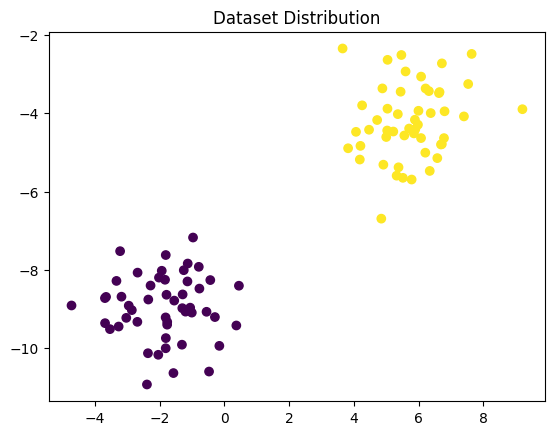

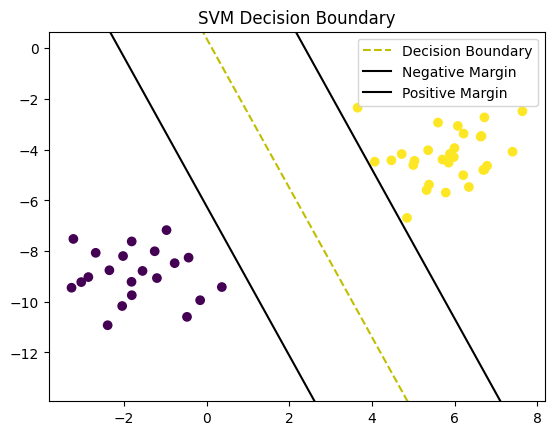

In [26]:
# Visualizing dataset and decision boundary
visualize_dataset()
visualize_svm()